<a href="https://colab.research.google.com/github/HYA6/DataAnalysis/blob/master/OpenSourceDataAnalysis_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 8강

# 데이터 분석 방법론

## 8-1 통계적 모형을 활용한 분석 (statsmodels)

In [1]:
import pandas as pd
import random
# statsmodels의 formula api 임포트
import statsmodels.formula.api as smf

## 난수 시드 설정
random.seed(1)

## 데이터 생성
X = list(range(1, 11))
y = [2*x + 1 + random.gauss(0, 1) for x in X] # x값에 대한 y값 생성

## 데이터프레임 생성
data = pd.DataFrame({'X': X, 'y': y})

## OLS(최소 제곱법) 회귀 모델 생성 및 학습
## 'y'를 종속 변수로 하고 다른 특성(X)을 독립 변수로 사용
model = smf.ols(formula = 'y ~ X', data = data).fit() # X값을 이용하여 y를 모델링하는 선형 회귀 모델 생성
# ols(): 선형 회귀 모델 생성 메소드
# fit(): 학습 메소드

## 모델 요약 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     345.0
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           7.28e-08
Time:                        07:12:55   Log-Likelihood:                -12.020
No. Observations:                  10   AIC:                             28.04
Df Residuals:                       8   BIC:                             28.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7622      0.615      2.866      0.0

## 8-2 기계학습을 활용한 분석 (scikit-learn)

In [2]:
# scikit-learn의 앙상블(ensemble) 알고리즘 중 RandomForestClassifier 임포트
# 앙상블 기법(ensemble method): 여러 개의 약한 학습기(weak learner)를 결합하여 하나의 강한 예측 모델을 만드는 기법 (ex. 배깅(bagging), 부스팅(boosting), 스태킹(stacking) 등)
# 랜덤 포레스트: 배깅 기반의 앙상블 기법, 다수의 결정 트리를 무작위로 생성하여 그 예측을 평균 또는 다수결 방식을 통합한다.
# RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='gini',
#                        max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
from sklearn.ensemble import RandomForestClassifier
# 모델 평가를 위한 데이터 분할(split) 함수 임포트
from sklearn.model_selection import train_test_split
# 모델의 정확도(accuracy)를 측정하는 함수 임포트
from sklearn.metrics import accuracy_score
# 예제 데이터셋(유방암 데이터) 로드 함수 임포트
from sklearn.datasets import load_breast_cancer

## 데이터 로드 및 분할
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

## 학습(70%)/테스트(30%) 데이터셋 분할
# 학습 데이터와 테스트 데이터를 분할하는 것이 중요 (학습할 때 나온 시험 문제가 테스트에 그대로 나오면 안되는 이유와 같음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 모델 생성
rf_model.fit(X_train, y_train) # 학습

## 예측 및 정확도 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.4f}')

모델 정확도: 0.9708


## 8-3 딥러닝을 활용한 분석 (tensorflow)

In [ ]:
from sklearn.metrics import classification_report
# 딥러닝 분석을 위한 tensorflow 임포트
import tensorflow as tf

## CIFAR-10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## MobileNetV2 기반 모델 구축(전이학습)
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3)) # 모델 생성
base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(160, 160), # 이미지 크기 (160X160)
    base_model, # 만든 모델 사용
    tf.keras.layers.GlobalAveragePooling2D(), # 글로벌 평균 풀링 추가
    tf.keras.layers.Dense(10) # 10개 클래스에 대한 완전 연결 계층 추가
])

## 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습
model.fit(x_train, y_train, epochs=5, validation_split=0.2) # 5번의 에포크 동안 학습

## 예측 및 성능 평가
y_pred = tf.argmax(model.predict(x_test), axis=1)
print("\nTest Accuracy:", model.evaluate(x_test, y_test, verbose=0)[1]) # 정확도
print("\nClassification Report:\n", classification_report(y_test, y_pred)) # 분류보고서

## 8-4 EDA 예시

==== 기본 통계량 ====
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02 

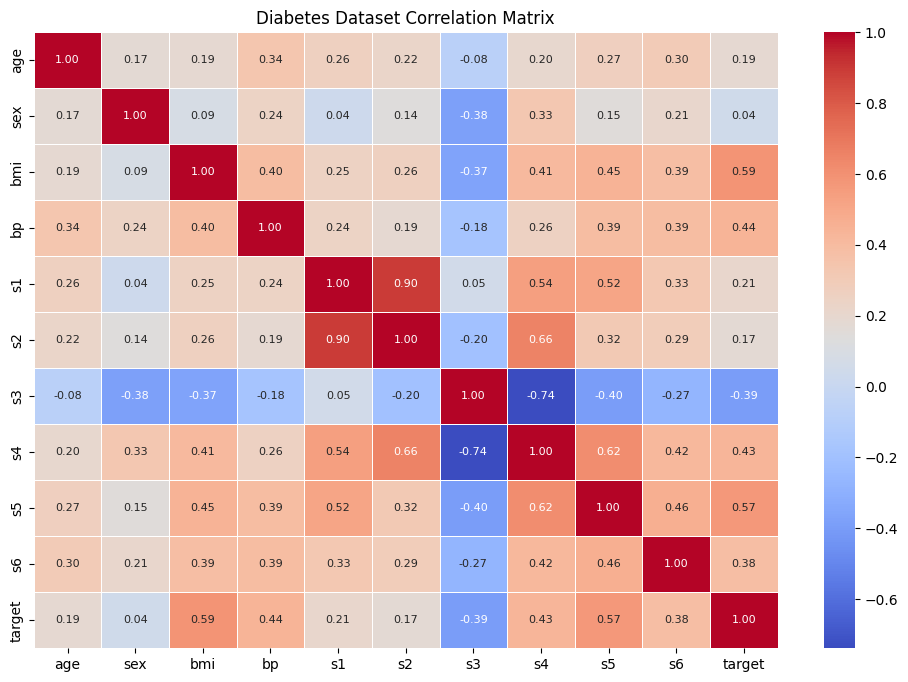

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

## 당뇨병 데이터셋 로드 및 데이터프레임 생성
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

## dataframe의 describe를 이용하여 기본 통계량 출력
print('==== 기본 통계량 ====')
print(df.describe())

## 상관 행렬 시각화
plt.figure(figsize=(12,8))
# dataframe의 각 열(변수)들 간의 상관 계수(correlation coefficient)를 계산하고 corr_matrix로 저장
corr_matrix = df.corr()
# seaborn으로 corr_matrix를 heatmap으로 시각화
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', annot_kws = {'size':8}, linewidths=0.5)
plt.title('Diabetes Dataset Correlation Matrix')
plt.show()

## 8-5 기술통계량 분석

In [6]:
import pandas as pd
import seaborn as sns

## 아이리스 데이터셋 로드
# sepal_length: 꽃받침 길이, sepal_width: 꽃받침 너비, petal_length: 꽃잎 길이, petal_width: 꽃잎 너비
df = sns.load_dataset('iris')
# df['species'] = iris.target

# 기술 통계량
print("=== 기본 통계량 ===")
print(df.describe()) # describe(): 개수, 평균, 표준편차, 최솟값, 사분위수, 최댓값 등 주요 통계량 계산

# 데이터 미리보기
print("\n=== 데이터 미리보기 ===")
print(df.head()) # 처음 5개 행 확인

# 그룹별 통계정보
print("\n=== 품종별 평균값 ===")
print(df.groupby('species').mean()) # 품종별 평균값 비교

=== 기본 통계량 ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

=== 데이터 미리보기 ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== 품종별 평균값 ===
            sepal_length  

## 8-6 데이터 시각화 분석

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

- 리소스 재시작

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 서브플롯 설정
plt.figure(figsize=(9, 12))
plt.suptitle('Iris 데이터셋 시각화', y=1.02, fontsize=14)

## 첫 번째 서브플롯: 꽃잎 길이 분포 (히스토그램)
plt.subplot(4, 1, 1)
# seaborn을 이용하여 petal_length를 10개 구간으로 나누어 히스토그램 표시
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')

## 두 번째 서브플롯: 꽃잎 길이 vs 너비 (산점도)
plt.subplot(4, 1, 2)
species_list = df['species'].unique()
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_list:
    species_data = df[df['species'] == species]
    # matplotlib를 이용하여 길이, 넓이를 산점도로 표시
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.legend()

## 세 번째 서브플롯: 품종별 꽃받침 길이 (박스플롯)
plt.subplot(4, 1, 3)
# seaborn을 이용하여 품종 별 꽃받침 길이를 박스플롯으로 표시
plt.title('품종별 꽃받침 길이 비교')
plt.xlabel('품종')
plt.ylabel('꽃받침 길이 (cm)')

## 네 번째 서브플롯: 숫자형 특성 간 상관관계 (히트맵)
plt.subplot(4, 1, 4)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('숫자형 특성 간 상관관계')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 8-7 자동화된 EDA 도구

In [ ]:
!pip install ydata_profiling

In [ ]:
import seaborn as sns
from ydata_profiling import ProfileReport

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 데이터 프로파일링 보고서 생성

## HTML 파일로 보고서 저장

## 보고서 표시 (Jupyter Notebook 환경에서 보고서가 바로 표시됨)